# TP 3 - Filtros

Integrantes:
* Martin Sebastián Rodriguez Turco
* Ian Cruz Diaz
* Agusting Galdeman

In [ ]:
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import scipy.signal as signal
from tqdm.notebook import tqdm

## Ejercicio 1 - Filtro Pasabajos

En la siguiente porción de código veremos como aplicando a una imagen un filtro pasabajos de diferentes kernels cambia el resultado que se observa en la imagen de salida

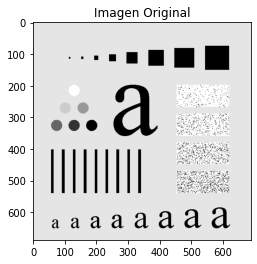

In [ ]:
img = cv.imread('/content/drive/Shareddrives/Imagenes/TP3/imgs/letter.tif', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.show()

Para este ejemplo realizaremos la convolución con el kernel a mano en una funcion que llamaremos low_pass_filter() que nos permita especificar el tamaño del kernel y el tipo de filtro aplicado, promediador o ponderado.

In [ ]:
'''
  @brief: Function to compute a mask of dim x dim in a certain position of an 
          image 
  @param im: Image where the mask will be computed                                 
  @param x: Position in x where the mask will be applied
  @param y: Position in y where the mask will be applied
  @param type: Type of mask to compute, it can be 'prom' or 'pond'
  @returns: The value to apply to the new image in the position x y.
'''
def compute_mask(im, x, y, dim, type= 'prom'):
  val = 0
  if type == "prom":
    mask = np.full((dim, dim), 1)
  elif type == "pond" and dim == 3:
    mask = np.array([
                      [1, 2, 1],
                      [2, 4 ,2],
                      [1, 2, 1]
                    ])
  else:
    raise ValueError("If type is 'prom', dim must be 3")
  for i in range(dim):
    for j in range(dim):
      val += mask[i][j] * im[i+x][j+y]
  return val / dim**2

'''
  @brief: Function to apply a low pass filter to an image, with capability to
          select the dimention of the kernel and the type of mask to apply.
  @param: img: Image to apply the low pass filter
  @param: dim: Kernel size to apply, it defaults to 3 (kernel= (3,3))
  @param: type: Type of kernel to apply, it defaults to a np.full kernel.
  @returns: A new image with the low pass filter applied. It does not change the 
            original image.
'''
def lpfilter(img, dim=3, type= 'prom'):
  assert dim%2 != 0, 'La variable dim no es impar!'
  new_img = np.zeros(img.shape, dtype=float)
  pad = dim // 2

  dummy = np.pad(img,pad,mode= 'edge')
  for i in tqdm(range(img.shape[0])):
    for j in range(img.shape[1]):
      new_img[i][j]=compute_mask(dummy,i,j,dim,type)
  return new_img

Processing Image number 1/5


  0%|          | 0/688 [00:00<?, ?it/s]

Processing Image number 2/5


  0%|          | 0/688 [00:00<?, ?it/s]

Processing Image number 3/5


  0%|          | 0/688 [00:00<?, ?it/s]

Processing Image number 4/5


  0%|          | 0/688 [00:00<?, ?it/s]

Processing Image number 5/5


  0%|          | 0/688 [00:00<?, ?it/s]

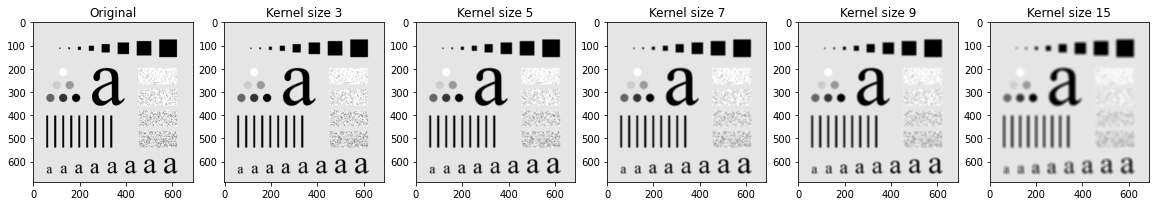

In [ ]:
kernel_sizes = [3, 5, 7, 9, 15]
figure, axes = plt.subplots(ncols=len(kernel_sizes)+ 1, figsize=(20, 20))
axes[0].imshow(img, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Original")
for i in range(len(kernel_sizes)):
  print(f'Processing Image number {i+1}/{len(kernel_sizes)}')
  imagen_as_prom = lpfilter(img, dim=kernel_sizes[i], type= 'prom')
  axes[i+1].imshow(imagen_as_prom, cmap="gray", vmin=0, vmax=255)
  axes[i+1].set_title(f'Kernel size {kernel_sizes[i]}')

## Ejercicio 2 - Filtro pasabajos y Threshold

En este ejemplo se busca aplicar el filtro pasabajos del ejercicio anterior, pero luego aplicarle un cierto threshold con el fin de poder apreciar como se pueden recuperar características de la imagen original.

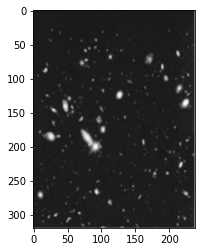

In [ ]:
black_sky = cv.imread('/content/drive/Shareddrives/Imagenes/TP3/imgs/black-sky.png', cv.IMREAD_GRAYSCALE)
plt.imshow(black_sky , cmap='gray', vmin=0, vmax=255)
plt.show()

Si bien la funcion de aplicar el filtro pasabajos ya fue definida en el ejercicio 1, la funcion de treshold no esta. Por lo que procederemos a definirla a continuación.

In [ ]:
'''
  @brief: Function to applpy a treshold to a certain image
  @param img: Image to apply the threshold
  @param percentage: Percentage of the brightness to apply the threshold
  @returns: A new image with the treshold applied. The function does not
            change the original img.
'''
def apply_threshold(img, percentage):
  new_img = np.zeros(img.shape)
  assert 0 < percentage < 1, 'Percentage must be between 0.0 and 1.0!'
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] > percentage*255:
          new_img[i][j] = img[i][j]
  return new_img

  0%|          | 0/320 [00:00<?, ?it/s]

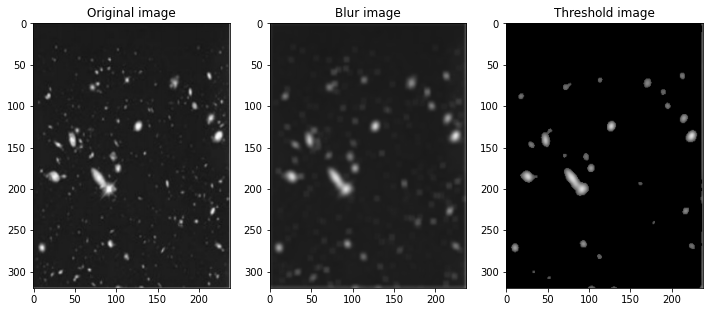

In [ ]:
figure, axes = plt.subplots(ncols=3, figsize=(12, 12))

black_sky_blur = lpfilter(black_sky, 7)
black_sky_blur_th = apply_threshold(black_sky_blur, 0.3)

axes[0].imshow(black_sky , cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original image")

axes[1].imshow(black_sky_blur, cmap="gray", vmin=0, vmax=255)
axes[1].set_title("Blur image")

axes[2].imshow(black_sky_blur_th, cmap="gray", vmin=0, vmax=255)
axes[2].set_title("Threshold image")
plt.show()

Como se puede observar, este proceso enfatiza las zonas de la imagen importantes a observar.

## Ejercicio 3 - Filtro Mediana

A continuacion procederemos a realizar el filtro mediana sobre una imagen y analizar los resultados

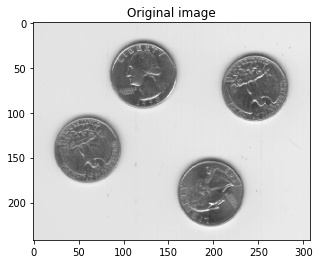

In [ ]:
img = Image.open('/content/drive/Shareddrives/Imagenes/TP3/imgs/eight.tif')
img = np.array(img)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
plt.show()

In [ ]:
'''
  @brief: Function to applpy a median mask to a certain image
  @param: im: Image to apply the mask
  @param: x: Position in x where the mask will be applied
  @param: y: Position in y where the mask will be applied
  @param: dim: Kernel Size of the mask.
  @returns: The median of the image in that position
'''
def compute_median_mask(im, x, y, dim):
  val = 0
  mask = im[x:x+dim, y:y+dim]
  mask = mask.flatten()
  mask = sorted(mask) # Ordena los valores de la lista de mask.
  while len(mask) > 1:  # Nos quedamos con la mediana
    if len(mask) > 1:
      mask = mask[1:]   #Sacamos el primer valor del arreglo
    if len(mask) > 1:
      mask = mask[:-1]  #Sacamos el ultimo valor del arreglo
  return mask[0]

'''
  @brief: Function to applpy a median filter to an image
  @param: im: Image to apply the filter
  @param: dim: Kernel Size of the median filter.
  @returns: A new image with the median filter applied. The original img
            is not changed.
'''
def median_filter(img, dim=3):
    assert dim%2 != 0, 'La variable dim no es impar'
    new_img = np.zeros(img.shape, dtype=float)
    pad = dim // 2
    dummy_img = np.pad(img, pad, mode="edge")
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = compute_median_mask(dummy_img, i, j, dim)
    return new_img

'''
  @brief: Function that adds salt and pepper noise to an image
  @param img: Image to apply the salt and peper noise
  @param prob: Probability of the noise to apply
  @returns: A new image with the noise applied. The original img is not
            changed.
'''
def sp_noise(img, prob):
  new_image = np.zeros(img.shape, np.uint8)
  th = 1 - prob 
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      rdn = random.random()
      if rdn < prob:
        new_image[i][j] = 0 # Aplico pepper
      elif rdn > th:
        new_image[i][j] = 255 # Aplico sal
      else:
        new_image[i][j] = img[i][j] # Dejo como estaba
  return new_image

  0%|          | 0/242 [00:00<?, ?it/s]

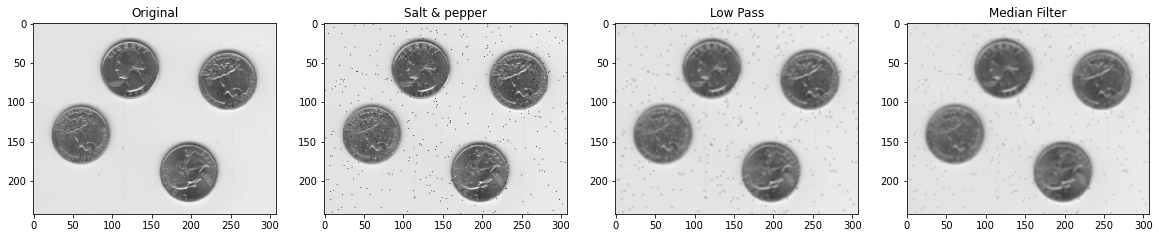

In [ ]:
img_w_sp = sp_noise(img, prob= 0.005)
img_w_sp_lp = lpfilter(img_w_sp, dim=3, type="prom")
img_sp_lp_med = median_filter(img_w_sp_lp, 3)

images = {
          "Original": img, 
          "Salt & pepper": img_w_sp,
          "Low Pass": img_w_sp_lp,
          "Median Filter": img_sp_lp_med
          }

figure, axes = plt.subplots(ncols=len(images), figsize=(20,20))
for i, img in enumerate(images):
  axes[i].imshow(images[img], cmap="gray", vmin=0, vmax=255)
  axes[i].set_title(f'{img}')

plt.show()

# Ejercicio 4

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


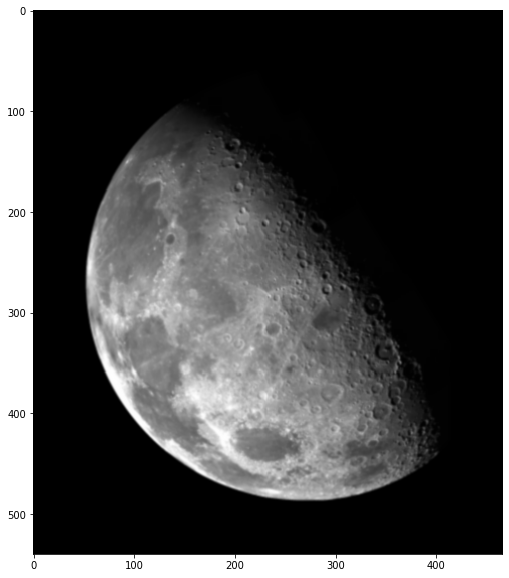

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

moon_original = cv.imread('/content/drive/Shareddrives/Imagenes/TP3/imgs/blurry_moon.tif')
plt.figure(figsize=(10,10))
plt.imshow(moon_original);

## Aplicamos el Laplaciano
OpenCV implementa una versión del kernel Laplaciano que no tiene en cuenta las diagonales y tiene un valor central negativo
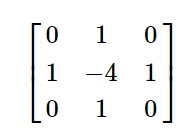

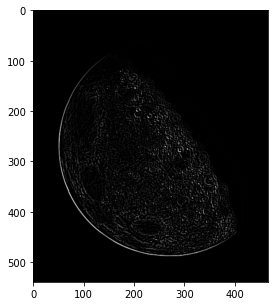

In [6]:
ddepth = -1
kernel_size = 3
moon_edges = cv.Laplacian(moon_original, ddepth, ksize=kernel_size)
plt.figure(figsize=(5,5))
plt.imshow(moon_edges);

Como el valor central del Laplaciano es negativo entonces realizamos la siguiente operación: Fondo-Bordes
Utilizamos las funciones de OpenCV para la resta dado que estas ofrecen aritmetica de saturación y mantienen los valores de los pixeles en el rango adecuado

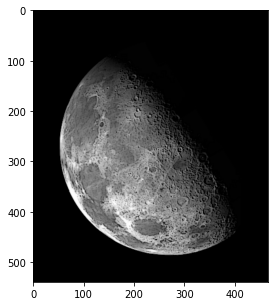

In [7]:
moon_edges_plus_background = cv.subtract(moon_original, moon_edges)
plt.figure(figsize=(5, 5))
plt.imshow(moon_edges_plus_background);

Ahora aplicamos el mismo filtro pero teniendo en cuenta las diagonales

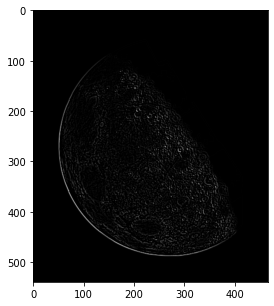

In [9]:
laplacian_kernel_with_borders =  [[1, 1, 1], 
                                 [1, -8, 1], 
                                 [1, 1, 1]]
laplacian_kernel_with_borders = np.array(laplacian_kernel_with_borders)  
moon_edges_with_diagonals = cv.filter2D(moon_original, -1, laplacian_kernel_with_borders)
plt.figure(figsize=(5,5))
plt.imshow(moon_edges_with_diagonals);

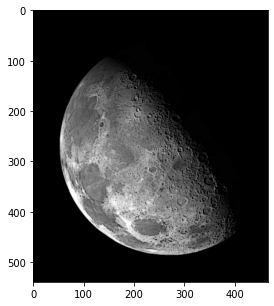

In [10]:
moon_with_diagonal_edges = cv.subtract(moon_original, moon_edges_with_diagonals)
plt.figure(figsize=(5,5))
plt.imshow(moon_with_diagonal_edges);

Haciendo la comparación comparación tenemos


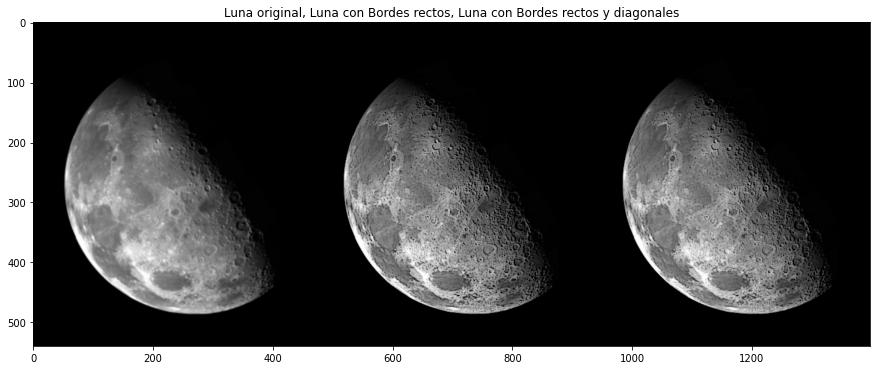

In [11]:
plt.figure(figsize=(15,15))
plt.title("Luna original, Luna con Bordes rectos, Luna con Bordes rectos y diagonales")
plt.imshow(np.hstack((moon_original, moon_edges_plus_background, moon_with_diagonal_edges)));

# Ejercicio 5

# High Boost
El uso de High boost es una modificación del mejoramiento de bordes anterior.

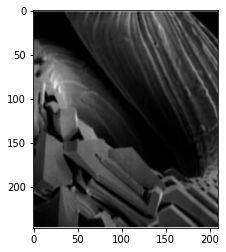

In [12]:
image_original = cv.imread('/content/drive/Shareddrives/Imagenes/TP3/imgs/high-boost.png')
plt.imshow(image_original);

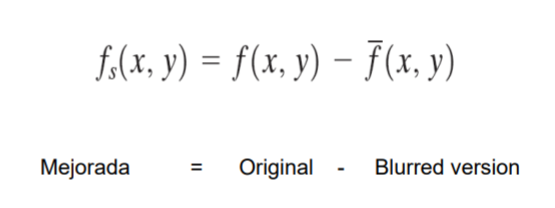

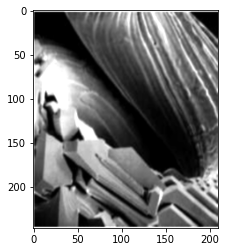

In [13]:
image_blurred = cv.blur(image_original, ksize=(3,3))
high_boost = cv.add(image_original, image_blurred)
plt.figure()
plt.imshow(high_boost);

De forma general:
Tenemos que el efecto de filtrar con: Laplaciano + A*delta
Resulta en la suma de la imagen original multiplicada por el factor A y el resultado de aplicar el operador Laplaciano. Hacer esto es más barato en calculo que multiplicar la imagen por A y luego restarle el Laplaciano

In [14]:
def get_laplace_high_boost_kernel_(A):
  laplacian_kernel_with_borders =  [[-1, -1, -1], 
                                   [-1, 8+A, -1], 
                                   [-1, -1, -1]]
  return np.array(laplacian_kernel_with_borders)

def high_boost_filter(img, A):
  img_original = img.copy()
  kernel = get_laplace_high_boost_kernel_(A)
  high_boosted = cv.filter2D(img_original, -1, kernel)
  return high_boosted

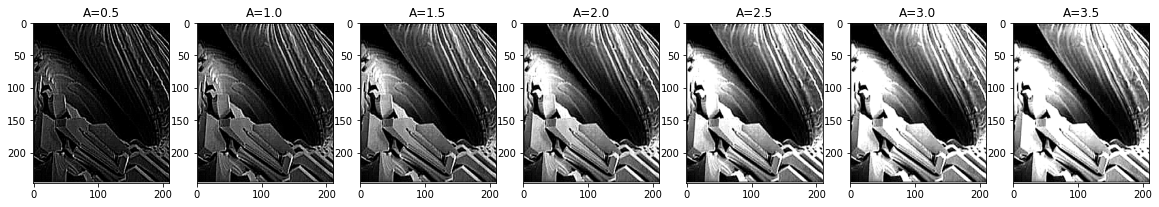

In [15]:
high_boosted_images = []
As = list(np.arange(0.5,4,0.5))
for A in As:
  high_boosted_images.append(high_boost_filter(image_original, A))

figure, axes = plt.subplots(ncols=len(high_boosted_images), figsize=(20, 13))
for i, img in enumerate(high_boosted_images):
  axes[i].imshow(img, cmap='gray', vmin=0, vmax=255)
  axes[i].set_title(f'A={As[i]}')
plt.show()

Podemos ver como la clarida aumenta conforme aumentamos A


## Ejercicio 6 - Filtro Homomórfico

Sabemos que una imagen puede describirse como sus componentes de iluminacion y reflectancia, sin embargo, aplicando la transformada de Fourier, estas 2 componentes no son separables. Por lo tanto es necesario realizar una transformación logaritmica para poder aplicar la transformada de fourier.

Los pasos que seguiremos para poder realizar esto serán:


1.   Aplicar el logaritmo sobre la imagen original
2.   Aplicar la FFT sobre la imagen generada
3.   Realizar la multiplicación por un filtro Gaussiano pasaaltos (que es lo mismo que aplicar el filtro en el dominio de la frecuencia)
4.   Relizar la IFFT
5.   Aplicar una funcion exponencial.



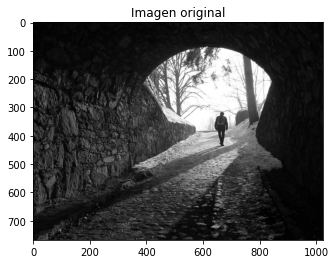

In [ ]:
img = cv.imread('/content/drive/Shareddrives/Imagenes/TP3/imgs/tun.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen original")
plt.show()

A continuación definiremos el filtro homomorfico

In [ ]:
'''
  @brief: Funcion que realiza el filtrado homomorfico a una imagen dada
  @param img: Imagen a la cual se le aplica el filtro.
  @param gh: Gamma High del filtro gaussiano
  @param gl: Gamma Low del filtro gaussiano
  @param sigma: desvio estandar de la gaussiana
  @para mu: media de la gaussiana
  @returns: Una nueva imagen con el filtro aplicado.
'''
def homomorfic(img, gh= 4, gl= 1.3, sigma= 0.1, mu= 0.0):
  img = np.array(img, dtype="float")
  
  # Generacion del filtro gaussiano
  x, y = np.meshgrid(np.linspace(-1, 1, img.shape[1]), np.linspace(-1, 1, img.shape[0]))
  d = np.sqrt((x**2) + (y**2))
  g = (gh - gl) * (1 - np.exp(-((d-mu)**2 / (sigma**2 )))) + gl

  img[::] += 1 # Para evitar -inf en el logaritmo de valores en 0
  
  # Pasos 1 y 2
  img_ln_h = np.fft.fftshift(np.fft.fft2(np.log(img)))
  # Paso 3: Multiplicacion por el filtro gaussiano
  for i in range(img_ln_h.shape[0]):
    for j in range(img_ln_h.shape[1]):
      img_ln_h[i][j] *= g[i][j]
  # Paso 4 y 5
  return np.exp(np.real(np.fft.ifft2(np.fft.ifftshift(img_ln_h))))

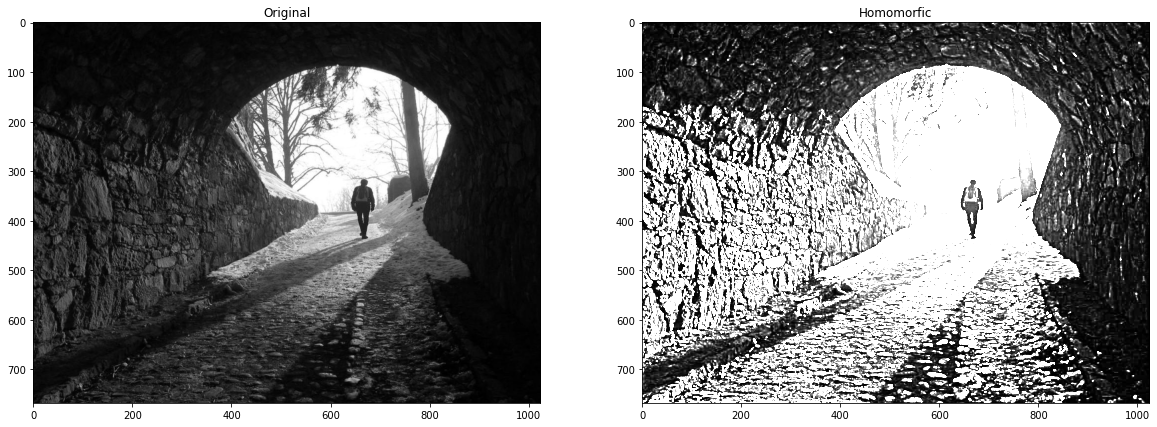

In [ ]:
images = {
          "Original": img, 
          "Homomorfic": homomorfic(img),
          }

figure, axes = plt.subplots(ncols=len(images), figsize=(20, 20))
for i, im in enumerate(images):
  axes[i].imshow(images[im], cmap="gray", vmin=0, vmax=255)
  axes[i].set_title(f'{im}')